Epoch 1/5


e:\B.E\DL\venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5723 - loss: 0.6661 - val_accuracy: 0.7795 - val_loss: 0.4650
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8197 - loss: 0.4072 - val_accuracy: 0.8305 - val_loss: 0.3950
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8837 - loss: 0.2893 - val_accuracy: 0.8147 - val_loss: 0.4346
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9291 - loss: 0.1907 - val_accuracy: 0.8168 - val_loss: 0.5070
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9647 - loss: 0.1070 - val_accuracy: 0.7925 - val_loss: 0.6349
You must install pydot (`pip install pydot`) for `plot_model` to work.


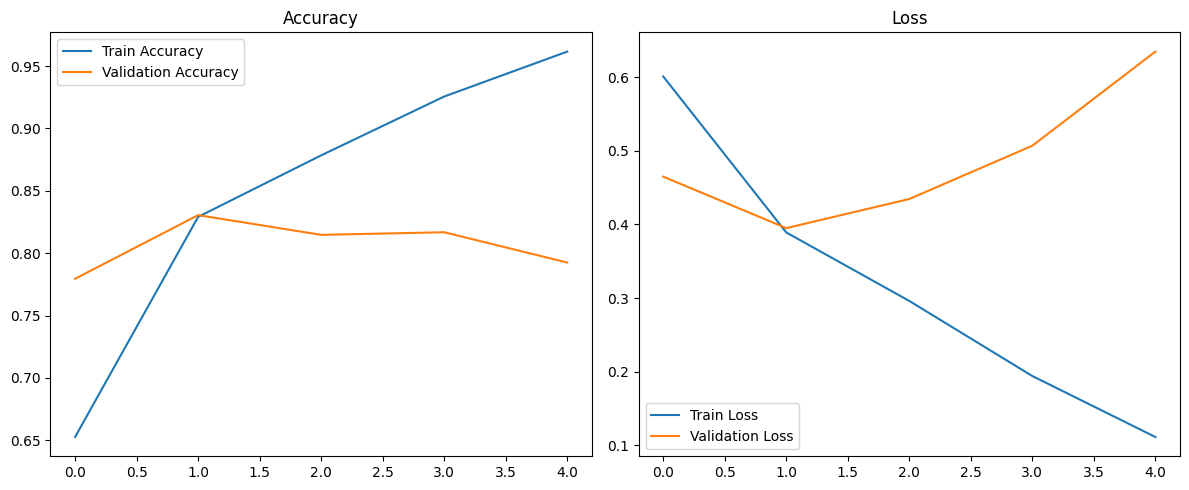

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7904 - loss: 0.6504
Test Accuracy: 0.7925


In [1]:
# 1. Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# 2. Set Parameters
vocab_size = 5000  # only consider top 5000 words
maxlen = 100       # cut reviews after 100 words
embedding_size = 32

# 3. Load and Preprocess Data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# 4. Build the RNN Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=maxlen))
model.add(SimpleRNN(64))
model.add(Dense(1, activation='sigmoid'))  # Binary classification (positive/negative)

# 5. Compile Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 6. Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# 7. Visualize the Network Graph
plot_model(model, show_shapes=True, show_layer_names=True)

# 8. Plot Accuracy and Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()

# 9. Evaluate on Test Set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

In [7]:
# Load the word index dictionary
word_index = imdb.get_word_index()

# Reverse the word index to get words from integers
reverse_word_index = {value: key for (key, value) in word_index.items()}

# Function to decode a review
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Predict on 5 random samples
import numpy as np

sample_indices = np.random.randint(0, len(X_test), 5)  # Randomly pick 5 samples
for i in sample_indices:
    sample_review = X_test[i].reshape(1, -1)
    prediction = model.predict(sample_review, verbose=0)
    sentiment = "Positive " if prediction[0][0] > 0.5 else "Negative"

    print("\nReview:")
    print(decode_review(X_test[i]))
    print(f"Predicted Sentiment: {sentiment}")
    print(f"Actual Sentiment: {'Positive' if y_test[i]==1 else 'Negative'}")


Review:
say it's bad taste done well also it's kind of amusing to watch the acting is so ? especially by ? that you just watch it in disbelief a friend laughed out loud at how bad ? was she improved in later pictures br br this is not for people who are easily offended even though it's over 30 years old it's still shocking however if you have an open mind and can take a lot of extreme ? this is a must see the only part that really was too much is what ? does at the very end
Predicted Sentiment: Negative
Actual Sentiment: Positive

Review:
10 year old class clown ? that less than a 10 year ? ability to compare them to ? top would be a grave insult upon their good name this movie tries to be funny using dull one liners which all seem to have been ? from 50's cartoons by the end i would have done anything to ? my memory of this movie but sadly the memories stay with me the only thing i can do is to warn others to never to watch this movie however it proves the ? true ? top can't act wort